In [1]:
import os
import sunpy.map
import numpy as np
import plotly.io as pio
from datetime import datetime
from matplotlib import colormaps, pyplot as plt

import prepare_data
import detect
import plot_detection
from settings import *

pio.renderers.default = 'vscode'
%matplotlib inline

# Data Inspection

## Prepare Data

Extract Data from File System

In [2]:
# Extract He I observation datetimes from FITS files
HE_DATE_LIST = prepare_data.get_fits_date_list(
    DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
)

# Extract magnetogram datetimes from 6302l FITS files
MAG_DATE_LIST = prepare_data.get_fits_date_list(
    DATE_RANGE, ALL_MAG_DIR, SELECT_MAG_DIR
)

# Extract EUV datetimes from FITS files
EUV_DATE_LIST = prepare_data.get_fits_date_list(
    DATE_RANGE, ALL_EUV_DIR, SELECT_EUV_DIR
)

num_maps = len(HE_DATE_LIST)
date_strs = [HE_DATE_LIST[0], HE_DATE_LIST[-1]]
file_date_str = f'{date_strs[0]}_{date_strs[-1]}'
datetimes = [datetime.strptime(date_str, DICT_DATE_STR_FORMAT)
             for date_str in date_strs]
title_date_strs = [datetime.strftime(d, '%m/%d/%Y') for d in datetimes]

Rename Data

In [ ]:
# Delete all gzipped files after renaming
remove_gzip = True

# Rename all He FITS files to include observation date in title
prepare_data.rename_dir(ALL_HE_DIR, remove_gzip)

## Available Data

In [3]:
print('Available Datetimes for He I Observations:')
prepare_data.display_dates(HE_DATE_LIST)

Available Datetimes for He I Observations:
2012_04_01__17_03 	2012_04_02__17_26 	2012_04_03__17_19 	2012_04_04__17_40 	
2012_04_05__18_10 	2012_04_06__17_23 	2012_04_08__18_13 	2012_04_09__21_57 	
2012_04_10__19_30 	2012_04_12__21_15 	2012_04_13__18_07 	2012_04_15__20_01 	
2012_04_16__17_07 	2012_04_17__17_41 	2012_04_18__17_07 	2012_04_19__17_56 	
2012_04_20__19_13 	2012_04_21__21_04 	2012_04_22__18_07 	2012_04_23__18_25 	
2012_04_24__18_58 	2012_04_27__18_28 	2012_04_28__19_07 	2012_04_29__18_40 	
2012_04_30__18_38 	2012_05_01__18_08 	2012_05_02__17_35 	2012_05_03__18_02 	
2012_05_04__17_13 	2012_05_05__19_35 	2012_05_06__18_33 	2012_05_07__17_59 	
2012_05_08__16_52 	2012_05_10__17_14 	2012_05_11__18_01 	2012_05_12__18_28 	
2012_05_13__17_52 	2012_05_14__18_42 	2012_05_15__17_39 	2012_05_16__17_11 	
2012_05_17__18_55 	2012_05_18__20_02 	2012_05_19__18_52 	2012_05_20__18_49 	
2012_05_21__19_03 	2012_05_22__18_04 	2012_05_26__19_57 	2012_05_27__19_17 	
2012_05_28__18_39 	2012_05_29__17

### KPVT Data

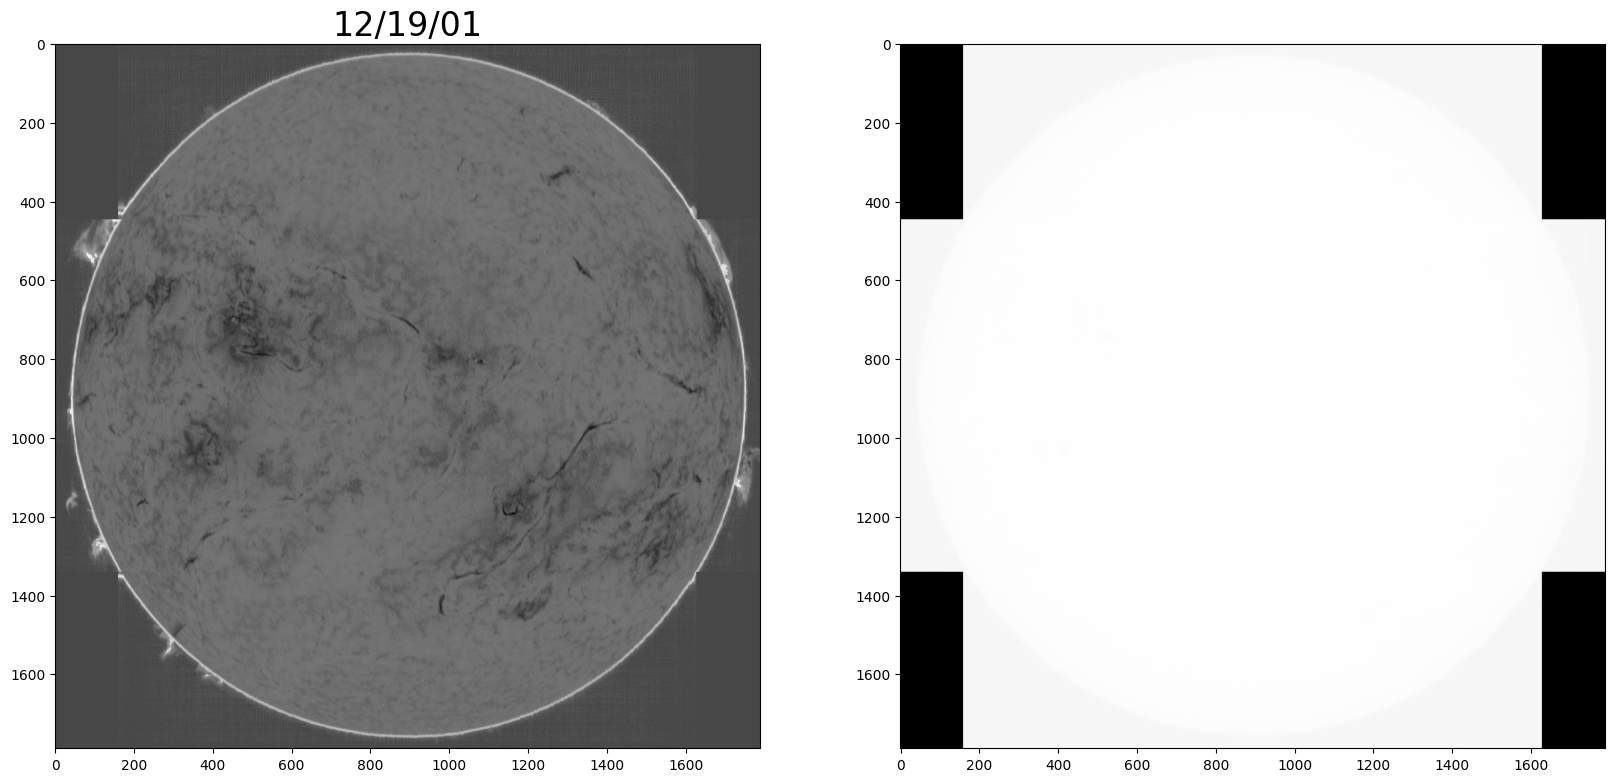

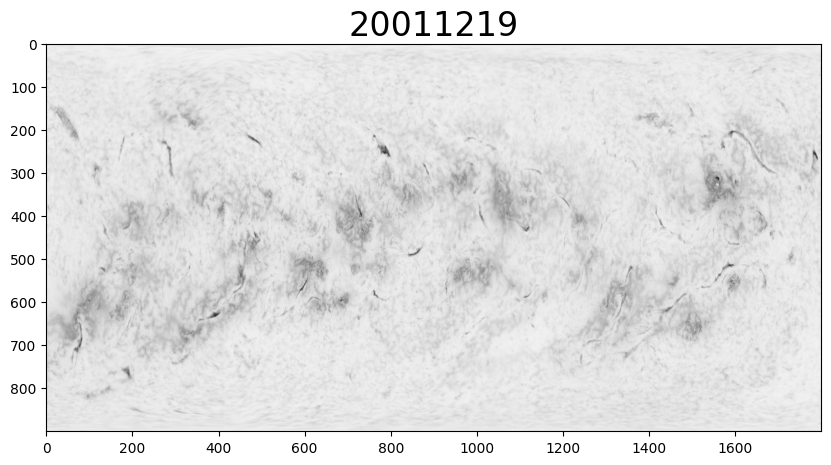

In [24]:
# https://nispdata.nso.edu/ftp/kpvt/daily/raw/
fits_path = TEST_HE_DIR + '01dec19h.fits'
im_list_1 = plot_detection.plot_raw_fits_content(
    fits_path, header_list=['UTDATE'], cmaps=[plt.cm.gray, plt.cm.gray],
    # print_header=True
)
# # https://nispdata.nso.edu/ftp/kpvt/daily/raw/ # Unclean
# fits_path = TEST_HE_DIR + '01dec19m.fits'
# im_list = plot_detection.plot_raw_fits_content(
#     fits_path, header_list=['UTDATE'], cmaps=[plt.cm.gray],
#     # print_header=True
# )
# https://nispdata.nso.edu/ftp/kpvt/synoptic/hel.hires/
fits_path = TEST_HE_DIR + 'hB1984.fits'
im_list_2 = plot_detection.plot_raw_fits_content(
    fits_path, header_list=['DATE9'], cmaps=[plt.cm.gray],
    # print_header=True
)
# # /ftp/kpvt/synoptic/helium
# fits_path = TEST_HE_DIR + 'h1984.fits'
# im_list = plot_detection.plot_raw_fits_content(
#     fits_path, header_list=['DATE'], cmaps=[plt.cm.gray],
#     # print_header=True
# )

Visualize

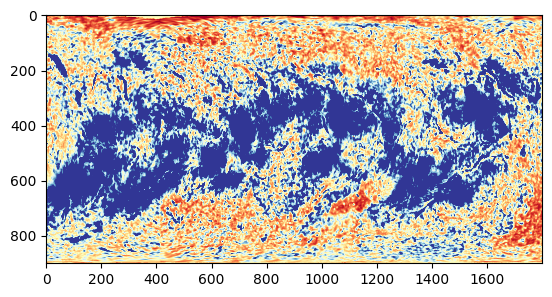

In [14]:
plt.imshow(im_list_2[0], vmin=-100, vmax=100, cmap='RdYlBu_r')

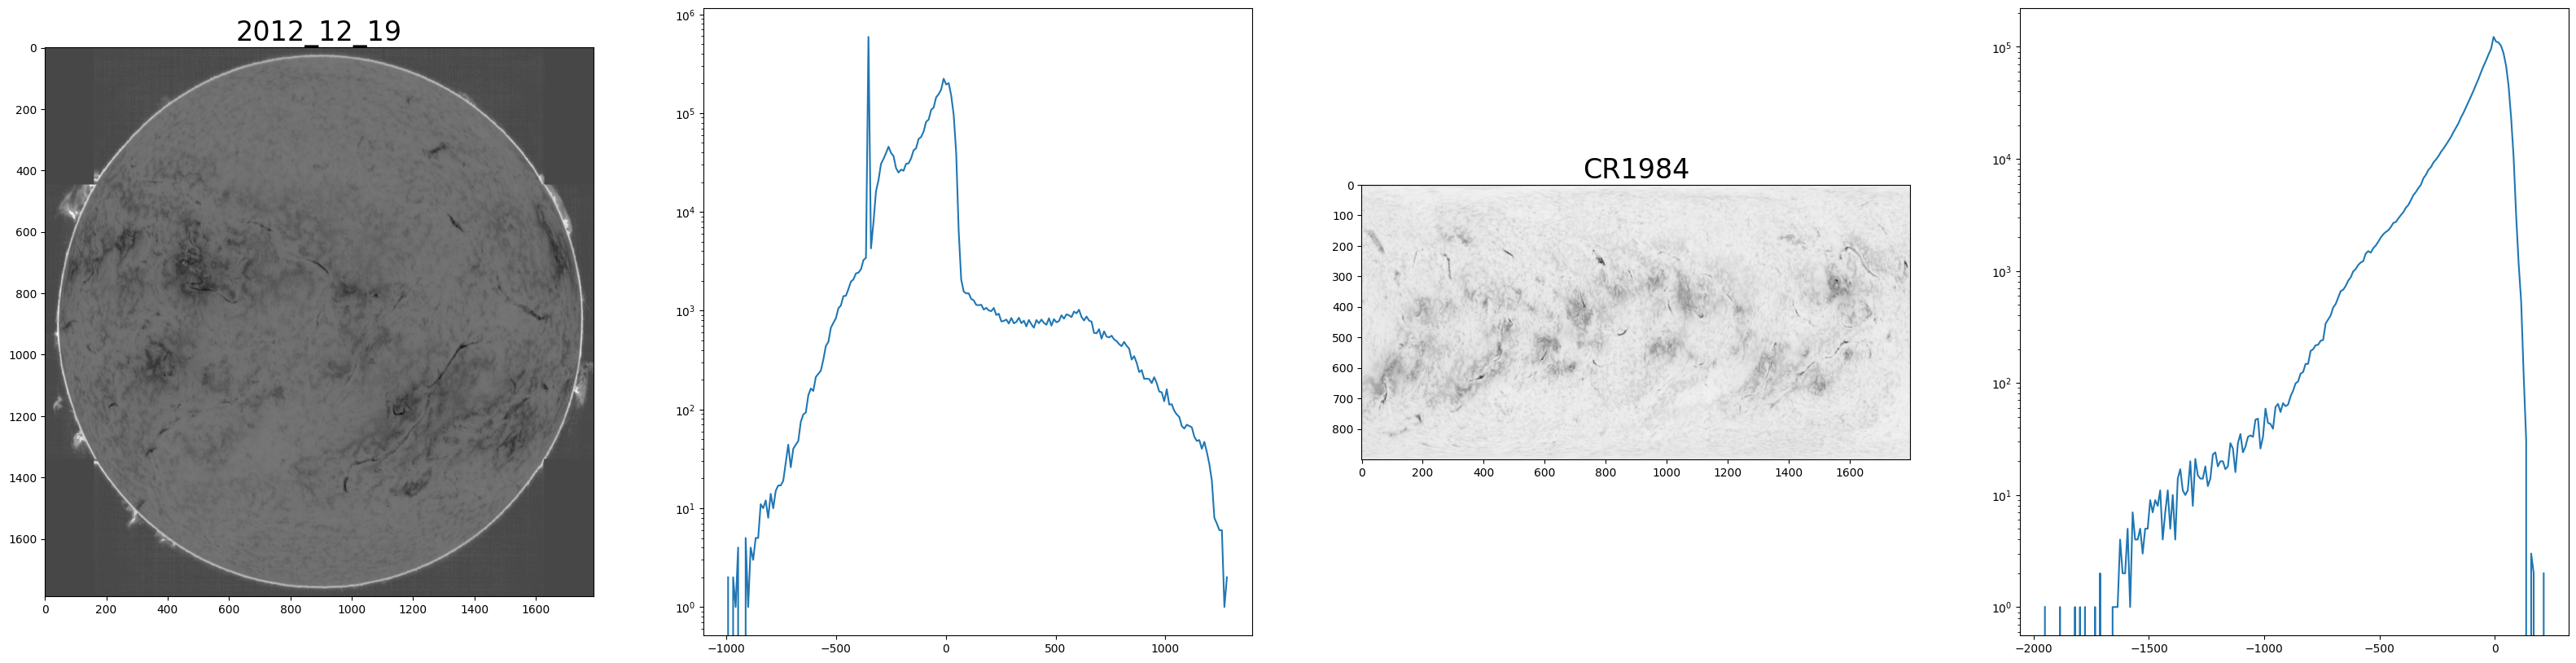

In [25]:
titles = ['2012_12_19', 'CR1984']
plot_detection.plot_hists(
    [im_list_1[0], im_list_2[0]], titles, semilogy=True
)

### VSM Data

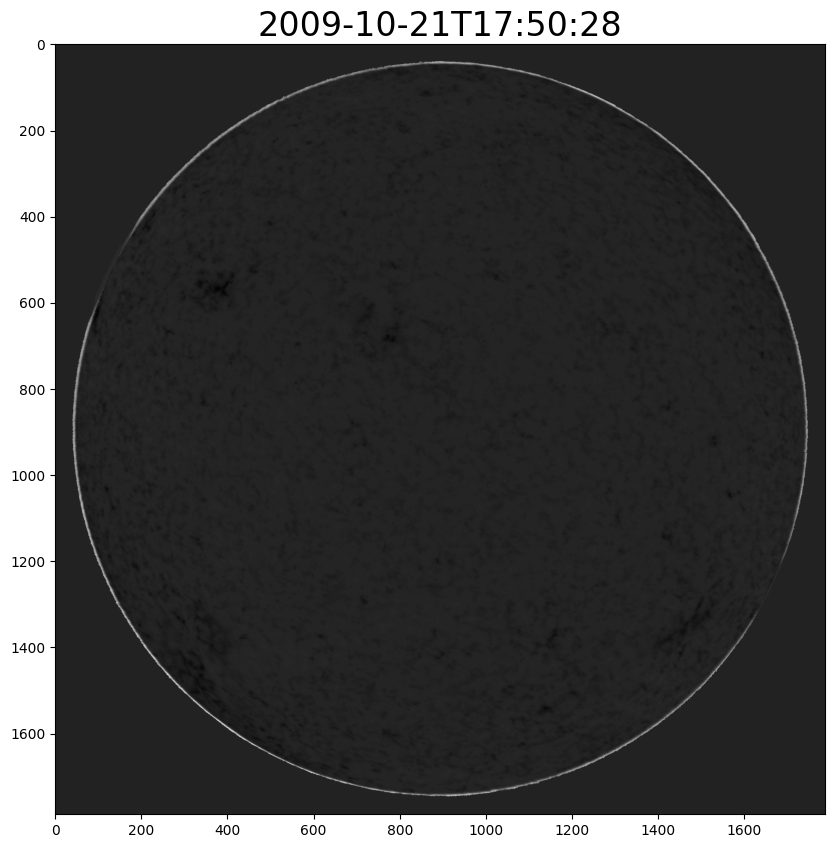

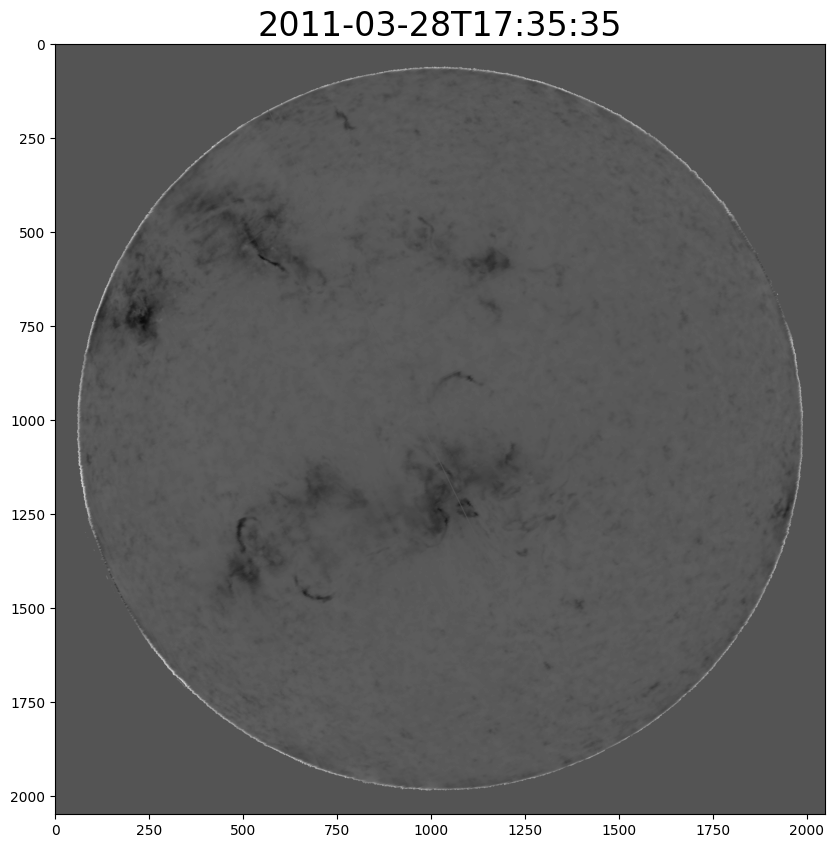

In [41]:
fits_path = ALL_HE_DIR + '2009_10_21__17_50.fts'
im_list_0 = plot_detection.plot_raw_fits_content(
    fits_path, header_list=['DATE-OBS'], cmaps=[plt.cm.gray, plt.cm.afmhot],
    # print_header=True
)
fits_path = ALL_HE_DIR + '2011_03_28__17_35.fts'
im_list_1 = plot_detection.plot_raw_fits_content(
    fits_path, header_list=['DATE-OBS'], cmaps=[plt.cm.gray, plt.cm.afmhot],
    # print_header=True
)
# fits_path = SELECT_HE_DIR + '2015_03_31__18_13.fts'
# im_list_2 = plot_detection.plot_raw_fits_content(
#     fits_path, header_list=['DATE-OBS'], cmaps=[plt.cm.gray, plt.cm.afmhot],
#     # print_header=True
# )
# fits_path = TEST_HE_DIR + 'kbv2g150410t1408c2162_000_int-mas_dim-900.fits'
# im_list_3 = plot_detection.plot_raw_fits_content(
#     fits_path, header_list=['DATE-OBS'], cmaps=[plt.cm.gray],
#     # print_header=True
# )

Visualize

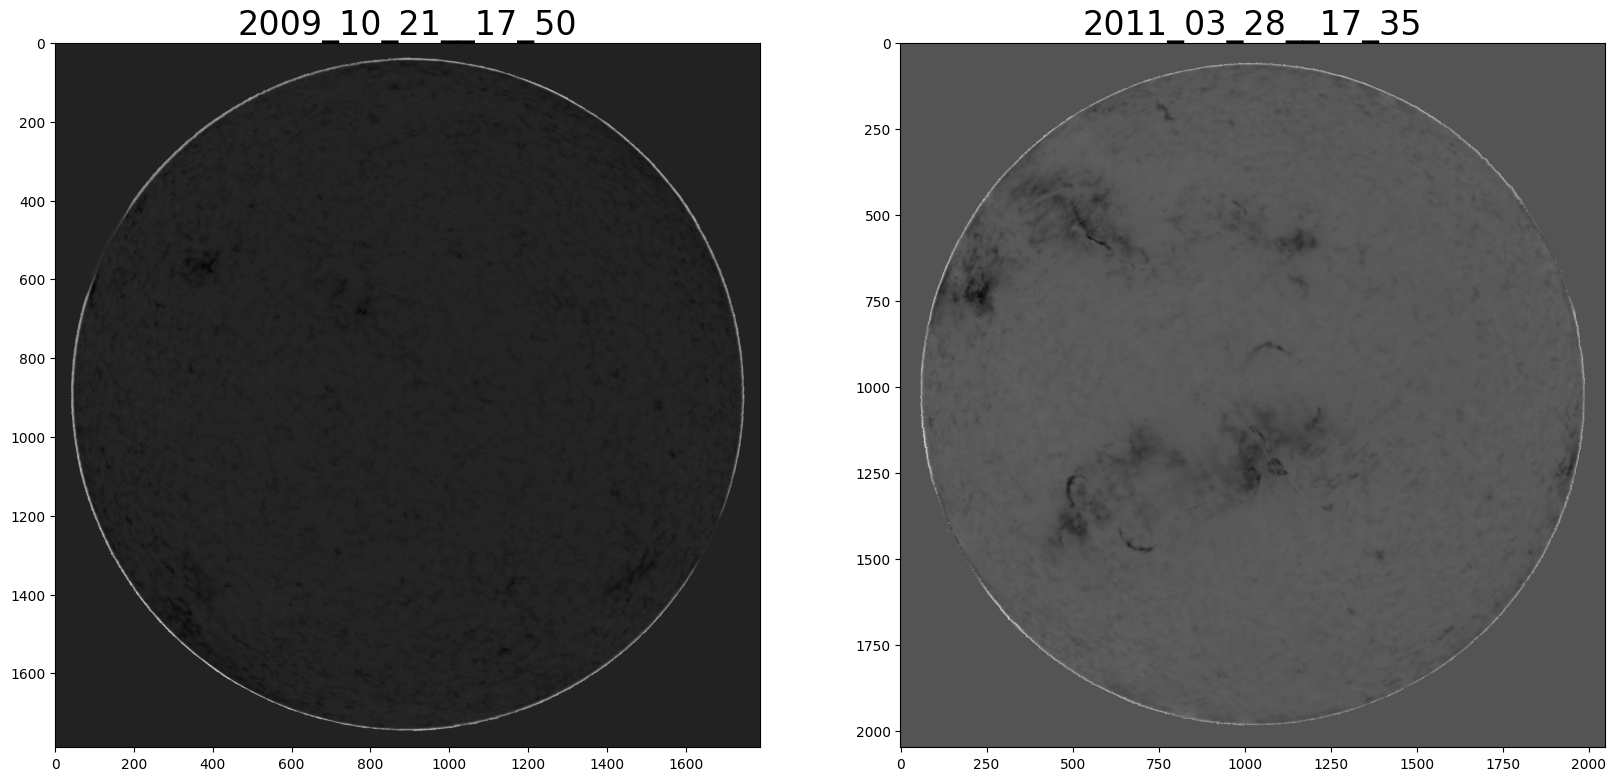

In [46]:
plot_detection.plot_images(image_list=[im_list_0[0], im_list_1[0]],
                        title_list=['2009_10_21__17_50', '2011_03_28__17_35'])

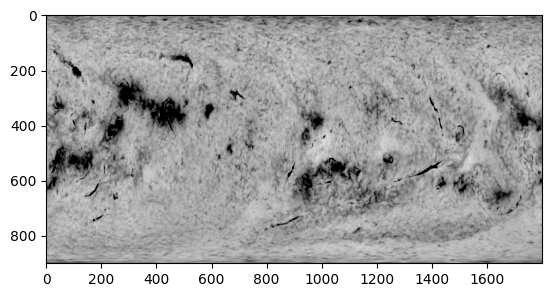

In [44]:
plt.imshow(im_list_2[0], vmin=-100, vmax=100, cmap='gray')
# plt.imshow(im_list_2[0], vmin=-100, vmax=100, cmap='RdYlBu_r')

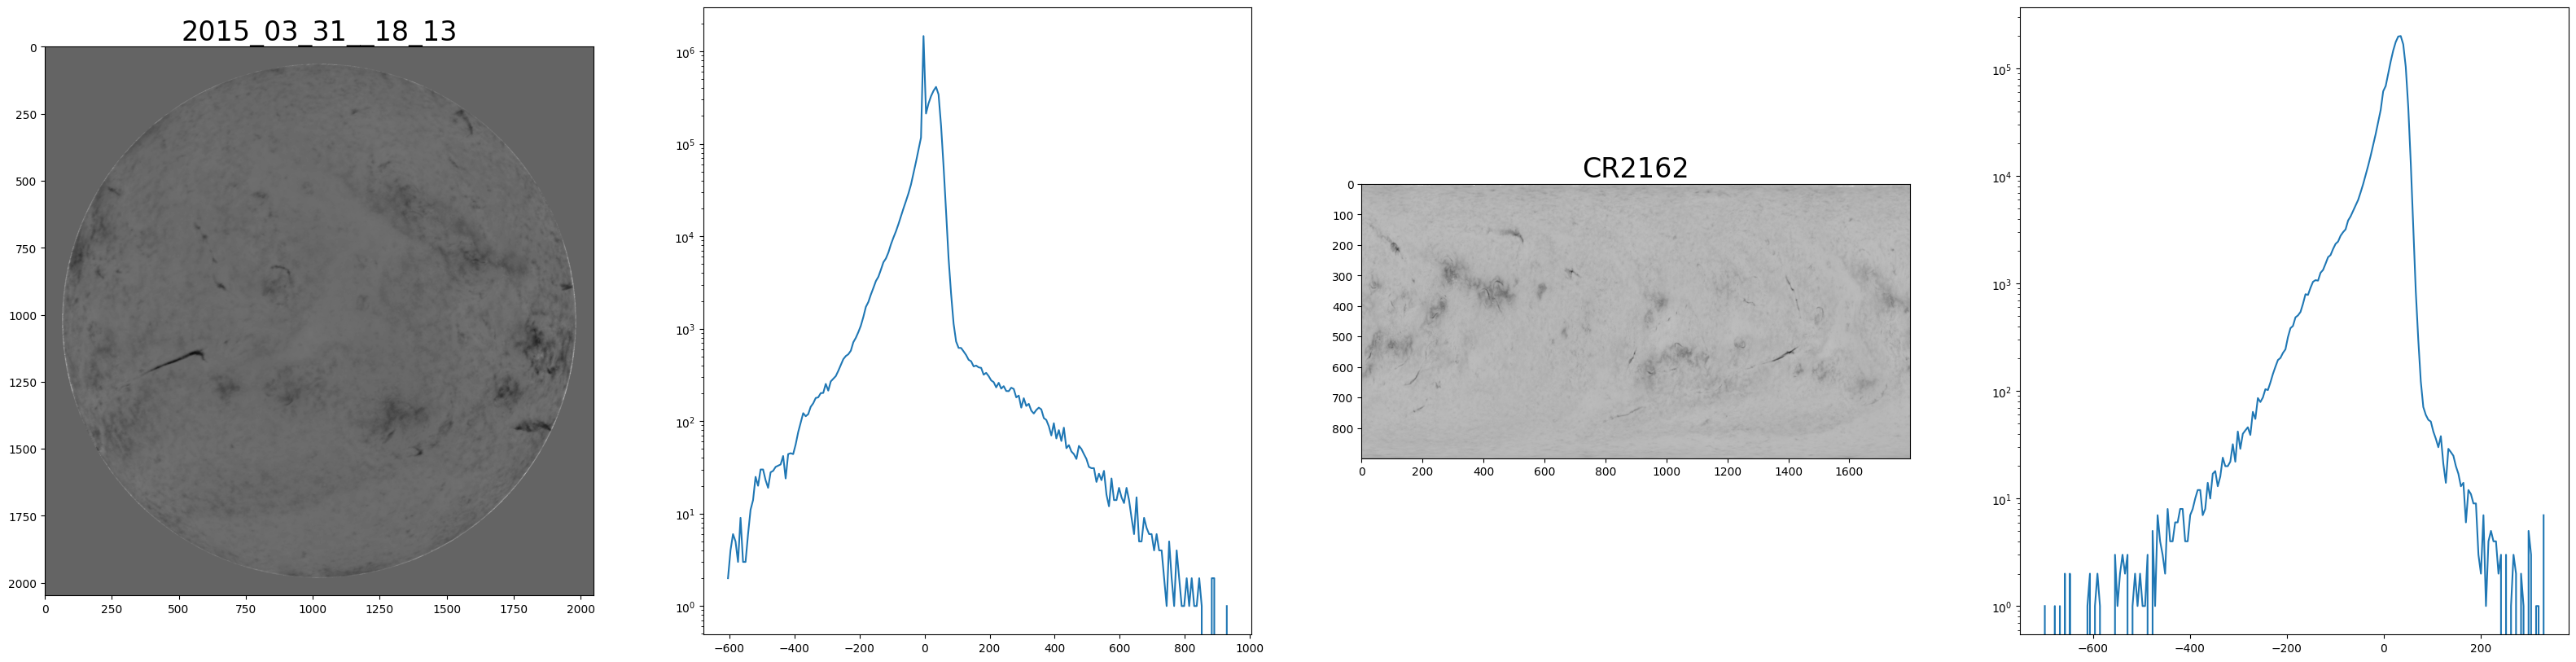

In [27]:
titles = ['2015_03_31__18_13', 'CR2162']
plot_detection.plot_hists(
    [im_list_1[0], im_list_2[0]], titles, semilogy=True
)

# Pre-Process

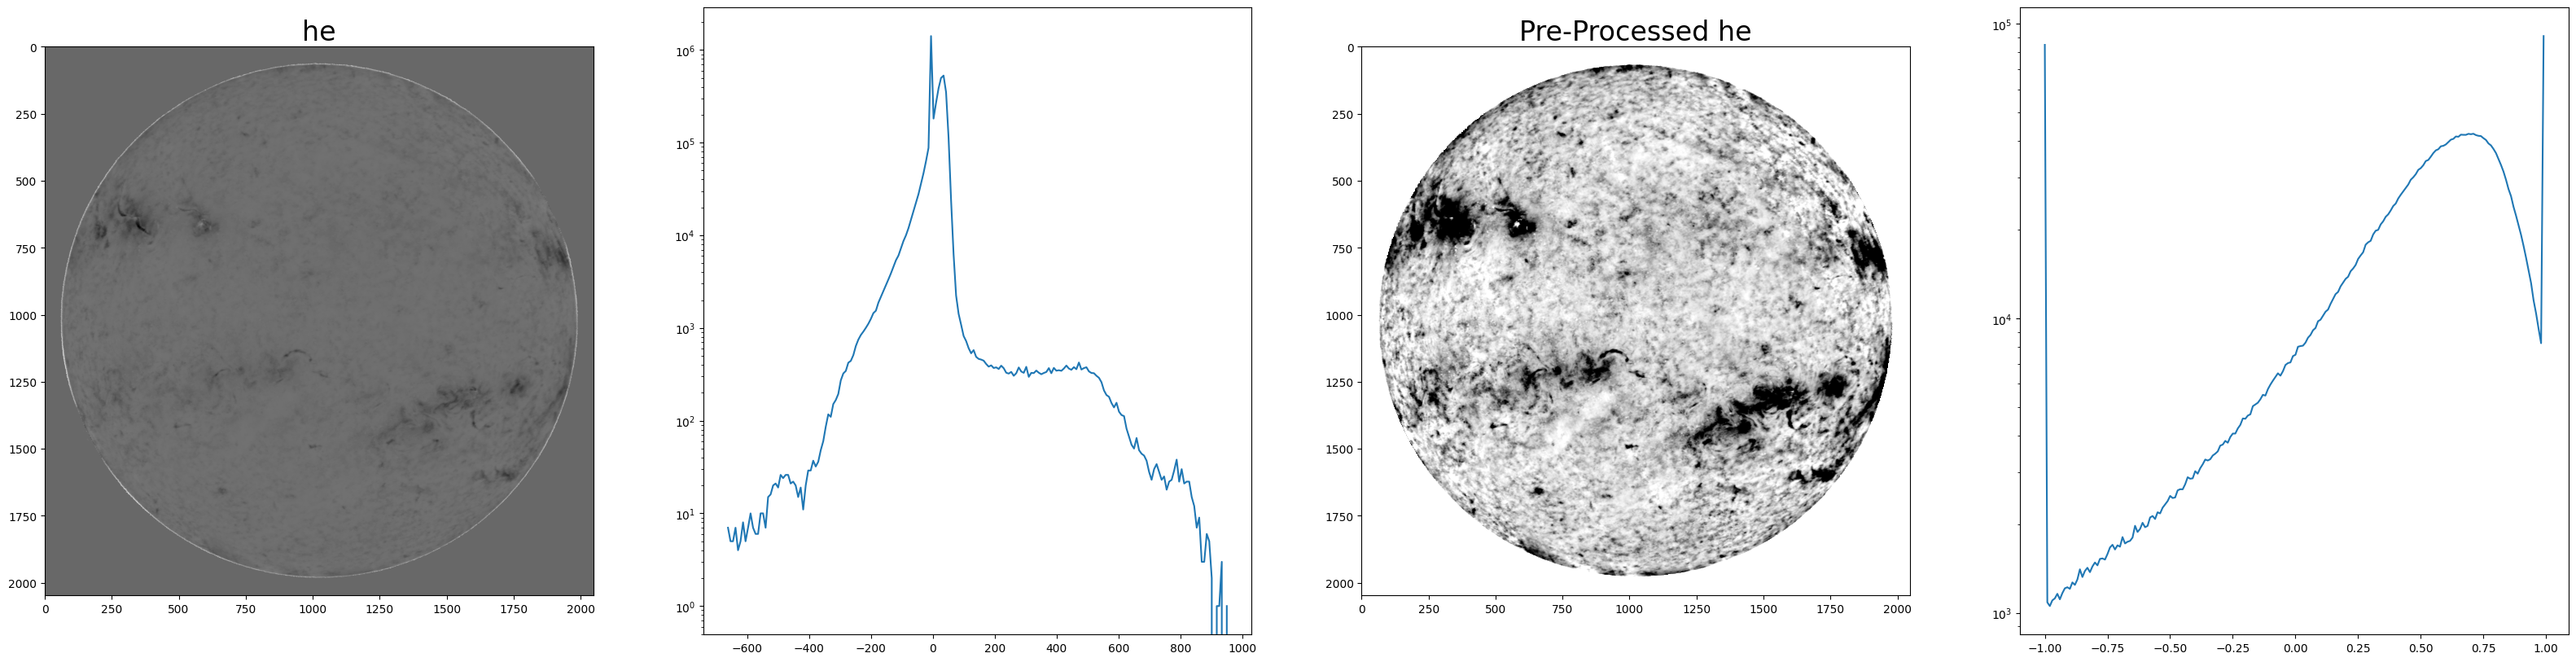

In [6]:
he_date_str = HE_DATE_LIST[0]

he_fits_file = prepare_data.get_fits_path(
    he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
) 
raw_he = prepare_data.get_image_from_fits(he_fits_file)
# he_band_cut, he_high_cut, he_nan = detect.pre_process_v0_1(
#     raw_he, peak_count_cutoff_percent=0.1
# )
he = detect.pre_process_v0_4(raw_he)

arrays = [raw_he, he]
titles = ['he', 'Pre-Processed he']
# arrays = [raw_he, he_nan, he_high_cut, he_band_cut]
# titles = ['he', 'he NaN', 'he High Cut', 'he Band Cut']

plot_detection.plot_hists(arrays, titles, semilogy=True)
# plot_detection.plot_hists(arrays[0:2], titles[0:2], semilogy=True)
# plot_detection.plot_hists(arrays[2:4], titles[2:4], semilogy=True)

# Design Variables

## Threshold

In [ ]:
he_date_str = '2012_06_22__18_13'

he_fits_file = prepare_data.get_fits_path(
    he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
) 
raw_he = prepare_data.get_image_from_fits(he_fits_file)
pre_processed_map = detect.pre_process_v0_1(raw_he)[0]

plot_detection.plot_thresholds(pre_processed_map, bounds=[75, 85, 100],
                               bounds_as_percent=True)

## Structuring Element Radius

In [ ]:
he_date_str = '2012_06_22__18_13'

he_fits_file = prepare_data.get_fits_path(
    he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
) 
raw_he = prepare_data.get_image_from_fits(he_fits_file)
pre_processed_map = detect.pre_process_v0_1(raw_he)[0]

percent_of_peak_list = [90, 90, 90]
morph_radius_list = [4,10,14]

ch_mask_list = [
    detect.get_ch_mask(pre_processed_map, percent_of_peak, morph_radius)
    for percent_of_peak, morph_radius
    in zip(percent_of_peak_list, morph_radius_list)
]
title_list = [f'{percent_of_peak:d}% of Peak | {radius:d}px Radius'
              for percent_of_peak in percent_of_peak_list
              for radius in morph_radius_list]
plot_detection.plot_images([pre_processed_map, [[0,0],[0,0]]], ['',''])
plot_detection.plot_images(ch_mask_list[:3], title_list[:3])

## Smoothness: Gradient Median

In [ ]:
# he_date_str = '2015_03_31__18_13'
he_date_str = '2015_07_16__17_12'
percent_of_peak = 90
morph_radius = 15

he_fits_file = prepare_data.get_fits_path(
    he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
) 
raw_he = prepare_data.get_image_from_fits(he_fits_file)
pre_processed_map = detect.pre_process_v0_1(raw_he)[0]

ch_mask = detect.get_ch_mask(pre_processed_map, percent_of_peak, morph_radius)

plot_detection.plot_sorted_ch_hists(pre_processed_map, ch_mask, apply_gradient=True,
                                    hist_stat='median')

# Data Products

## Demonstrate On Single Map

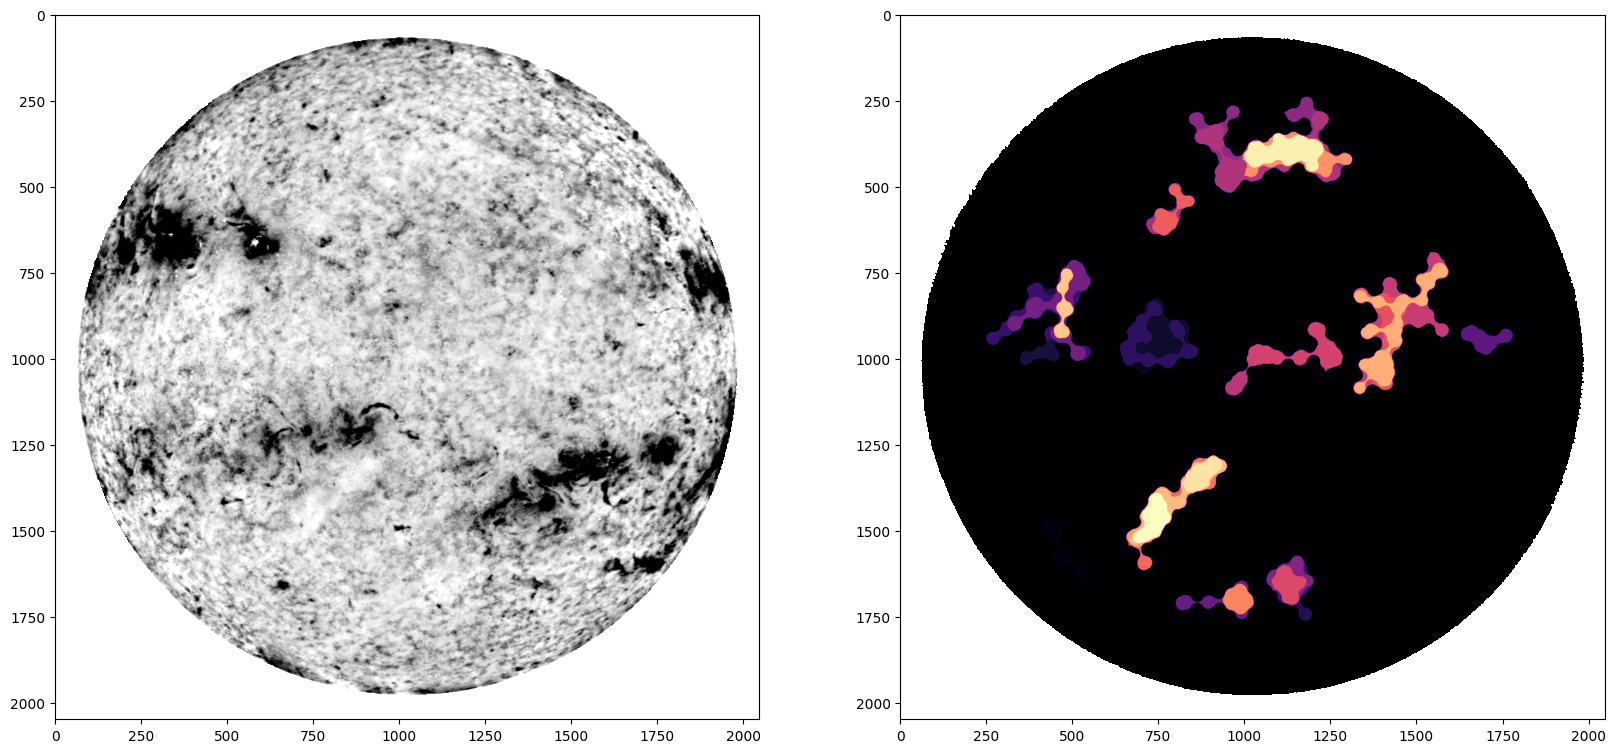

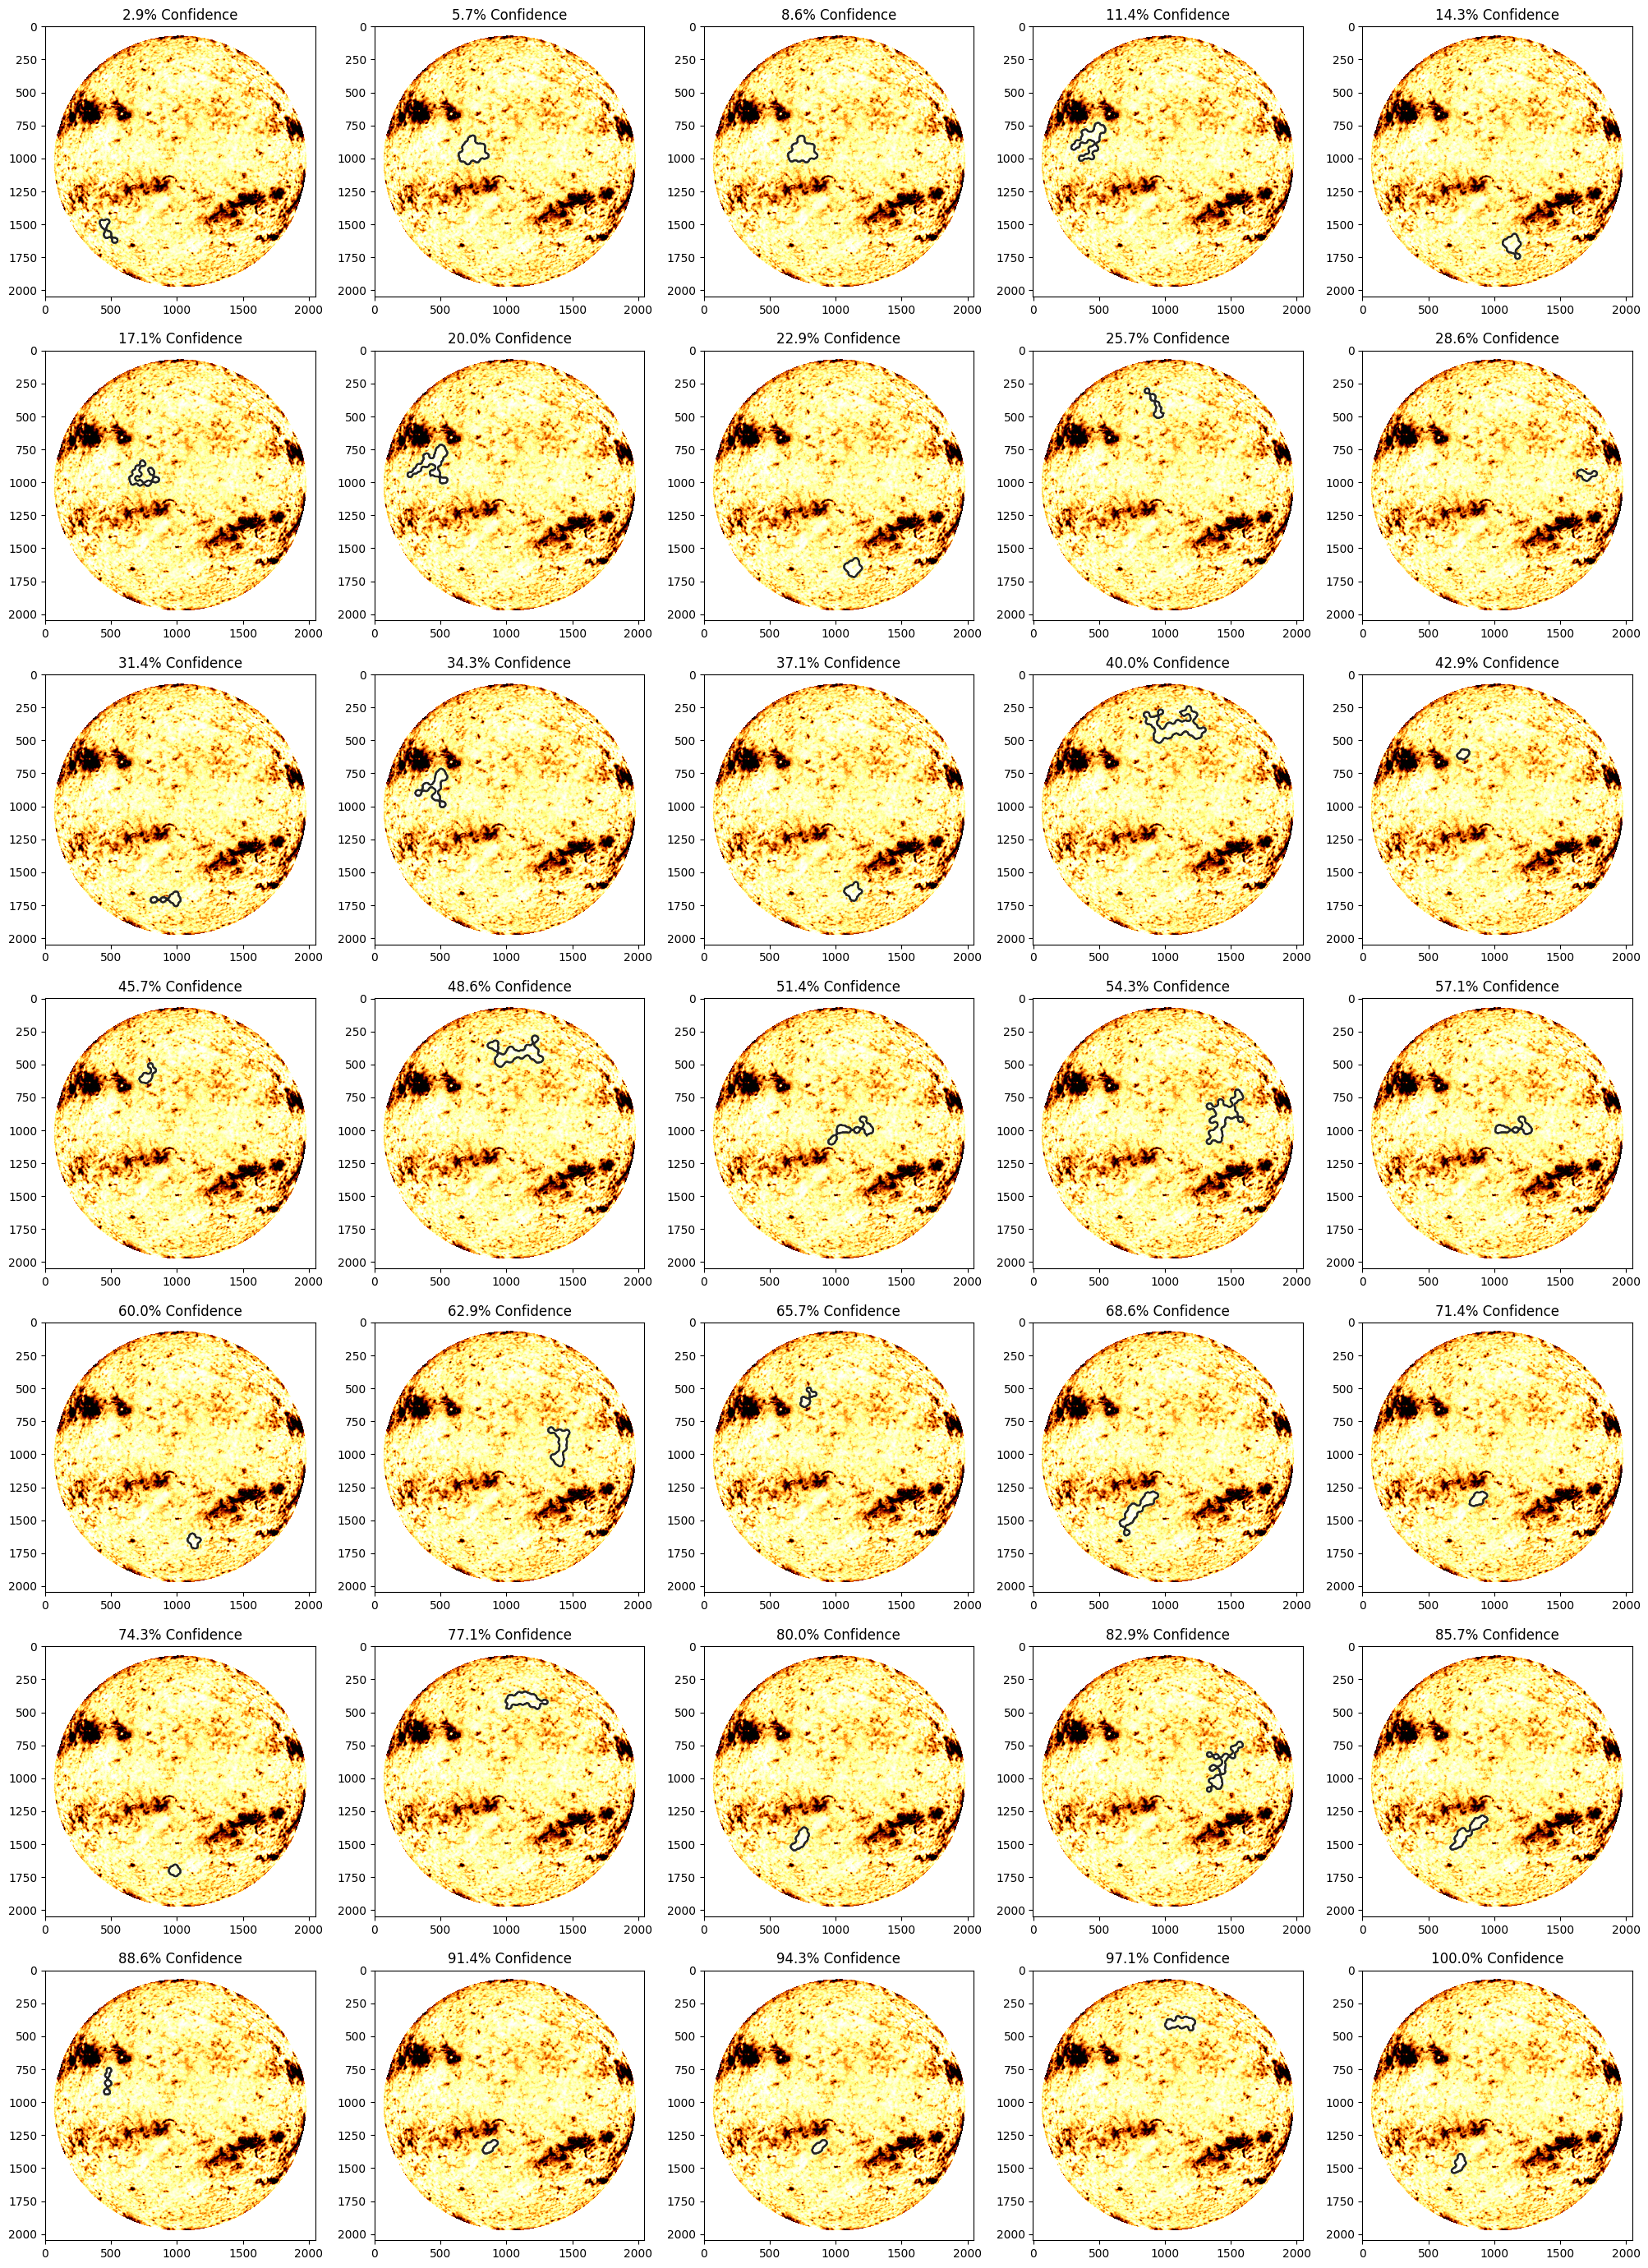

In [3]:
he_date_str = HE_DATE_LIST[0]
percent_of_peak_list = [80,80, 90, 100,100]
morph_radius_list = [18,20, 16, 16,20]


he_fits_file = prepare_data.get_fits_path(
    he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
) 
raw_he = prepare_data.get_image_from_fits(he_fits_file)
pre_processed_map = detect.pre_process_v0_4(raw_he)
ensemble_map, isolated_ch_im_list, confidence_list = detect.get_ensemble_v0_3(
    pre_processed_map, percent_of_peak_list, morph_radius_list
)
plot_detection.plot_ensemble(
    pre_processed_map, ensemble_map, confidence_list, isolated_ch_im_list
)

## Save Files

### Pre-Processed Maps

In [3]:
overwrite = False

if not os.path.isdir(PREPROCESS_SAVE_DIR):
    os.makedirs(PREPROCESS_SAVE_DIR)

for he_date_str in HE_DATE_LIST:
    
    euv_date_str = prepare_data.get_nearest_date_str(
        EUV_DATE_LIST, selected_date_str=he_date_str
    )
    
    # Optionally overwrite existing files
    pre_process_file = (PREPROCESS_SAVE_DIR + he_date_str
                        + '_pre_processed_map.npy')
    if os.path.isfile(pre_process_file) and not overwrite:
        print((f'He {he_date_str} pre-processed map already exists.'))
        continue
    
    # he_fits_file = prepare_data.get_fits_path(
    #     he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
    # ) 
    he_fits_file = f'{RATIO_SAVE_DIR}He{he_date_str}_EUV{euv_date_str}.fits'

    raw_he = prepare_data.get_image_from_fits(he_fits_file)
    
    # pre_processed_map = detect.pre_process_v0_1(raw_he)[0]
    pre_processed_map = detect.pre_process_v0_4(raw_he)
    
    save_list = [he_date_str, pre_processed_map]
    np.save(pre_process_file, np.array(save_list, dtype=object), 
            allow_pickle=True)
    print(f'{he_date_str} Pre-Processed Map Saved')

2013_02_16__18_23 Pre-Processed Map Saved
2013_06_19__15_35 Pre-Processed Map Saved
2015_02_27__20_39 Pre-Processed Map Saved
2015_03_29__18_00 Pre-Processed Map Saved
2015_03_31__18_13 Pre-Processed Map Saved
2015_04_28__17_25 Pre-Processed Map Saved
2015_06_19__16_33 Pre-Processed Map Saved
2015_07_16__17_12 Pre-Processed Map Saved


v0.6

In [5]:
overwrite = True

if not os.path.isdir(PREPROCESS_MAP_SAVE_DIR):
    os.makedirs(PREPROCESS_MAP_SAVE_DIR)

for he_date_str in HE_DATE_LIST:
    
    # Optionally overwrite existing files
    pre_process_file = (PREPROCESS_MAP_SAVE_DIR + he_date_str
                        + '_pre_processed_map.fits')
    if os.path.isfile(pre_process_file) and not overwrite:
        print((f'He {he_date_str} pre-processed map already exists.'))
        continue
    
    he_fits_file = prepare_data.get_fits_path(
        he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
    )
    he_map = prepare_data.get_solis_sunpy_map(he_fits_file)
    
    pre_processed_map = detect.pre_process_v0_5(he_map)
    
    pre_processed_map.save(pre_process_file, overwrite=overwrite)
    print(f'{he_date_str} Pre-Processed Map Saved')

2013_02_16__18_23 Pre-Processed Map Saved
2013_06_19__15_35 Pre-Processed Map Saved
2015_02_27__20_39 Pre-Processed Map Saved
2015_03_29__18_00 Pre-Processed Map Saved
2015_03_31__18_13 Pre-Processed Map Saved
2015_04_28__17_25 Pre-Processed Map Saved
2015_06_19__16_33 Pre-Processed Map Saved
2015_07_16__17_12 Pre-Processed Map Saved


### Single Masks

In [ ]:
overwrite = False

percent_of_peak = 80
morph_radius = 18


if not os.path.isdir(DETECTION_SAVE_DIR):
    os.makedirs(DETECTION_SAVE_DIR)

for he_date_str in HE_DATE_LIST:
    
    # Optionally overwrite existing files
    mask_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ensemble_map.npy'
    if os.path.isfile(mask_file) and not overwrite:
        print((f'He {he_date_str} single mask already exists.'))
        continue
    
    pre_process_file = (PREPROCESS_SAVE_DIR + he_date_str
                        + '_pre_processed_map.npy')
    pre_processed_map = np.load(pre_process_file, allow_pickle=True)[-1]

    ch_mask = detect.get_ch_mask(
        pre_processed_map, percent_of_peak, morph_radius
    )
    
    save_list = [he_date_str, ch_mask]
    np.save(mask_file, np.array(save_list, dtype=object), allow_pickle=True)
    print(f'{he_date_str} Single Mask Saved')

### Ensemble Maps

In [4]:
overwrite = True

# percent_of_peak_list = [80,80, 90, 100,100]
# morph_radius_list = [18,20, 16, 16,20]
percent_of_peak_list = [100,100, 110, 120,120]
morph_radius_list = [18,20, 16, 16,20]


if not os.path.isdir(DETECTION_SAVE_DIR):
    os.makedirs(DETECTION_SAVE_DIR)

for he_date_str in HE_DATE_LIST:
    
    # Optionally overwrite existing files
    ensemble_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ensemble_map.npy'
    if os.path.isfile(ensemble_file) and not overwrite:
        print((f'He {he_date_str} ensemble map already exists.'))
        continue
    
    pre_process_file = (PREPROCESS_SAVE_DIR + he_date_str
                        + '_pre_processed_map.npy')
    pre_processed_map = np.load(pre_process_file, allow_pickle=True)[-1]

    ensemble_map = detect.get_ensemble_v0_3(
        pre_processed_map, percent_of_peak_list, morph_radius_list
    )[0]
    
    save_list = [he_date_str, ensemble_map]
    np.save(ensemble_file, np.array(save_list, dtype=object), allow_pickle=True)
    print(f'{he_date_str} Ensemble Map Saved')

2013_02_16__18_23 Ensemble Map Saved
2013_06_19__15_35 Ensemble Map Saved
2015_02_27__20_39 Ensemble Map Saved
2015_03_29__18_00 Ensemble Map Saved
2015_03_31__18_13 Ensemble Map Saved
2015_04_28__17_25 Ensemble Map Saved
2015_06_19__16_33 Ensemble Map Saved
2015_07_16__17_12 Ensemble Map Saved


v0.5

In [8]:
overwrite = False

percent_of_peak_list = [80,80, 90, 100,100]
morph_radius_list = [18,20, 16, 16,20]
unipolarity_threshold = 0.5


if not os.path.isdir(DETECTION_SAVE_DIR):
    os.makedirs(DETECTION_SAVE_DIR)

for he_date_str in HE_DATE_LIST:
    
    # Optionally overwrite existing files
    ensemble_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ensemble_map.npy'
    if os.path.isfile(ensemble_file) and not overwrite:
        print((f'He {he_date_str} ensemble map already exists.'))
        continue
    
    # Extract He I observation
    he_file = f'{ALL_HE_DIR}{he_date_str}.fts'
    he_map = prepare_data.get_solis_sunpy_map(he_file)

    pre_process_file = (PREPROCESS_SAVE_DIR + he_date_str
                        + '_pre_processed_map.npy')
    pre_processed_map_data = np.load(pre_process_file, allow_pickle=True)[-1]
    pre_processed_map = sunpy.map.Map(
        np.flipud(pre_processed_map_data), he_map.meta
    )

    # Extract saved processed magnetograms
    mag_date_str = prepare_data.get_nearest_date_str(
        MAG_DATE_LIST, selected_date_str=he_date_str
    )
    reprojected_fits_file = (f'{REPROJECT_MAG_SAVE_DIR}'
                            f'Mag{mag_date_str}_He{he_date_str}.fits')
    reprojected_mag_map = sunpy.map.Map(reprojected_fits_file)

    ensemble_map_data = detect.get_ensemble_v0_5(
        pre_processed_map, reprojected_mag_map,
        percent_of_peak_list, morph_radius_list,
        unipolarity_threshold
    )[0]
    
    save_list = [he_date_str, ensemble_map_data]
    np.save(ensemble_file, np.array(save_list, dtype=object), allow_pickle=True)
    print(f'{he_date_str} Ensemble Map Saved')

2012_04_01__17_03 Ensemble Map Saved
2012_04_02__17_26 Ensemble Map Saved
2012_04_03__17_19 Ensemble Map Saved
2012_04_04__17_40 Ensemble Map Saved
2012_04_05__18_10 Ensemble Map Saved
2012_04_06__17_23 Ensemble Map Saved
2012_04_08__18_13 Ensemble Map Saved
2012_04_09__21_57 Ensemble Map Saved
2012_04_10__19_30 Ensemble Map Saved
2012_04_12__21_15 Ensemble Map Saved
2012_04_13__18_07 Ensemble Map Saved
2012_04_15__20_01 Ensemble Map Saved
2012_04_16__17_07 Ensemble Map Saved
2012_04_17__17_41 Ensemble Map Saved
2012_04_18__17_07 Ensemble Map Saved
2012_04_19__17_56 Ensemble Map Saved
2012_04_20__19_13 Ensemble Map Saved
2012_04_21__21_04 Ensemble Map Saved
2012_04_22__18_07 Ensemble Map Saved
2012_04_23__18_25 Ensemble Map Saved
2012_04_24__18_58 Ensemble Map Saved
2012_04_27__18_28 Ensemble Map Saved
2012_04_28__19_07 Ensemble Map Saved
2012_04_29__18_40 Ensemble Map Saved
2012_04_30__18_38 Ensemble Map Saved
2012_05_01__18_08 Ensemble Map Saved
2012_05_02__17_35 Ensemble Map Saved
2

## Save Media

### Detection Images

He & Single Mask Images

In [ ]:
output_dir = DETECTION_IMAGE_DIR + 'Preprocess_Single_Comparison/'


if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

for he_date_str in HE_DATE_LIST:
    
    pre_process_file = (PREPROCESS_SAVE_DIR + he_date_str
                        + '_pre_processed_map.npy')
    pre_processed_map = np.load(pre_process_file, allow_pickle=True)[-1]
    
    he_fits_file = prepare_data.get_fits_path(
        he_date_str, DATE_RANGE, ALL_HE_DIR, SELECT_HE_DIR
    ) 
    raw_he = prepare_data.get_image_from_fits(he_fits_file)
    he = np.where(raw_he == raw_he[0,0], np.NaN, raw_he)
    
    mask_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ch_mask.npy'
    single_mask = np.load(mask_file, allow_pickle=True)[-1]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax = axes.ravel()

    ax[0].set_title(he_date_str, fontsize=24)
    ax[0].imshow(pre_processed_map, cmap=plt.cm.gray)
    
    ax[1].imshow(he, cmap=plt.cm.afmhot, vmin=-100, vmax=100)
    ax[1].contour(single_mask, linewidths=2, cmap=plt.cm.gray)

    plt.savefig(f'{output_dir}{he_date_str}.jpg')
    plt.close(fig)
    print(f'{he_date_str} map saved.')

He & Ensemble Map Images

In [5]:
output_dir = DETECTION_IMAGE_DIR + 'Preprocess_Comparison/'


if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

for he_date_str in HE_DATE_LIST:
    
    pre_process_file = (PREPROCESS_SAVE_DIR + he_date_str
                        + '_pre_processed_map.npy')
    pre_processed_map = np.load(pre_process_file, allow_pickle=True)[-1]
    
    ensemble_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ensemble_map.npy'
    ensemble_map = np.load(ensemble_file, allow_pickle=True)[-1]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax = axes.ravel()

    ax[0].set_title(he_date_str, fontsize=24)
    ax[0].imshow(pre_processed_map, cmap=plt.cm.gray)
    
    ax[1].imshow(ensemble_map, cmap=plt.cm.magma)

    plt.savefig(f'{output_dir}{he_date_str}.jpg')
    plt.close(fig)
    print(f'{he_date_str} map saved.')

2012_06_01__17_15 map saved.
2012_06_02__21_21 map saved.
2012_06_04__17_18 map saved.
2012_06_05__17_16 map saved.
2012_06_06__19_11 map saved.
2012_06_07__18_10 map saved.
2012_06_08__19_51 map saved.
2012_06_09__19_20 map saved.
2012_06_10__17_44 map saved.
2012_06_11__18_01 map saved.
2012_06_12__16_59 map saved.
2012_06_13__17_20 map saved.
2012_06_14__17_41 map saved.
2012_06_15__17_01 map saved.
2012_06_16__19_29 map saved.
2012_06_17__18_07 map saved.
2012_06_18__17_16 map saved.
2012_06_19__17_56 map saved.
2012_06_20__19_06 map saved.
2012_06_21__18_53 map saved.
2012_06_22__18_13 map saved.
2012_06_23__18_34 map saved.
2012_06_25__16_50 map saved.
2012_06_26__16_51 map saved.
2012_06_27__16_15 map saved.
2012_06_28__16_44 map saved.
2012_06_29__16_43 map saved.


### Outcomes vs Time

Pre-Process Moments vs Time

In [ ]:
import pandas as pd
from datetime import datetime

hist_stat_list = []

for he_date_str in HE_DATE_LIST:
    pre_process_file = (PREPROCESS_SAVE_DIR + he_date_str
                        + '_pre_processed_map.npy')
    pre_processed_map_data = np.load(pre_process_file, allow_pickle=True)[-1]
    
    peak_counts_val = detect.get_peak_counts_loc(
        pre_processed_map_data, bins_as_percent=False
    )
    hist_stat_list.append(
        [peak_counts_val, np.nanstd(pre_processed_map_data)]
    )

# Convert to dataframes
datetime_list = [datetime.strptime(he_date_str, DICT_DATE_STR_FORMAT)
                 for he_date_str in HE_DATE_LIST]
hist_df = pd.DataFrame(
    hist_stat_list, columns=['Peak', 'StDev'],
    index=datetime_list
)

In [ ]:
overwrite = True
output_dir = DETECTION_IMAGE_DIR + 'Histogram_Moments/'
cmap = 'plasma'
ylabel = 'Histogram Moments'


if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

for he_date_str in HE_DATE_LIST:
    
    # Optionally overwrite existing files
    img_file = f'{output_dir}{he_date_str}.jpg'
    if os.path.isfile(img_file) and not overwrite:
        print((f'He {he_date_str} map already exists.'))
        continue
    
    pre_process_file = (PREPROCESS_SAVE_DIR + he_date_str
                        + '_pre_processed_map.npy')
    pre_processed_map = np.load(pre_process_file, allow_pickle=True)[-1]
    
    hist, edges = detect.get_hist(pre_processed_map,
                                         bins_as_percent=False)
    
    ensemble_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ensemble_map.npy'
    ensemble_map = np.load(ensemble_file, allow_pickle=True)[-1]
    
    fig = plt.figure(figsize=(18, 10))
    
    ax = fig.add_subplot(231)
    ax.set_title(he_date_str)
    ax.imshow(pre_processed_map, cmap=plt.cm.gray)
    
    ax = fig.add_subplot(232)
    ax.set_title('Semilog Histogram')
    ax.semilogy(edges[1:], hist)
    if 'Rescale' in DETECTION_VERSION_DIR:
        ax.set_xlim([-1.3, 1.1])
        ax.set_ylim([1E2, 5E4])
    else:
        ax.set_xlim([-110, 110])
        ax.set_ylim([1E1, 5E4])
    
    ax = fig.add_subplot(233)
    ax.imshow(ensemble_map, cmap=plt.cm.magma)
    
    ax = fig.add_subplot(2, 3, (4, 6))
    datetimes = hist_df.index
    ax.plot(hist_df['StDev'], label='Standard Deviation', linewidth=3)
    ax.plot(hist_df['Peak'], label='Mode', linewidth=3)
    
    # Vertical line for datetime indicator
    vline_datetime = datetime.strptime(he_date_str, DICT_DATE_STR_FORMAT)
    min_moment = min(hist_df.min())
    max_moment = max(hist_df.max())
    ax.vlines(x=[vline_datetime, vline_datetime], ymax=2*max_moment, ymin=0,
              colors='k', linestyles='dashed')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.set_ylabel(ylabel)
    
    ax.set_xlim([datetimes[0], datetimes[-1]])
    if 'Rescale' in DETECTION_VERSION_DIR:
        ax.set_ylim([0.4, 0.8])
    else:
        ax.set_ylim([0.9*min_moment, 1.1*max_moment])
    
    ax.legend(reverse=True)

    plt.savefig(img_file)
    plt.close(fig)
    print(f'{he_date_str} map saved.')

Pre-Process Outcomes vs Time

In [ ]:
percent_of_peak_list = [80, 90, 100, 110]
num_ch_df, area_percent_df, area_df, px_percent_df = detect.get_thresh_outcome_time_series_dfs(
    HE_DATE_LIST, percent_of_peak_list, ALL_HE_DIR, PREPROCESS_SAVE_DIR
)

In [ ]:
overwrite = True
output_dir = DETECTION_IMAGE_DIR + 'Thresh_Area_Percentage/'
outcome_df = area_percent_df
cmap = 'plasma'
ylabel = 'Detected Area Percentage (%)'


if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

for he_date_str in HE_DATE_LIST[24:25]:
    
    # Optionally overwrite existing files
    img_file = f'{output_dir}{he_date_str}.jpg'
    if os.path.isfile(img_file) and not overwrite:
        print((f'He {he_date_str} map already exists.'))
        continue
    
    pre_process_file = (PREPROCESS_SAVE_DIR + he_date_str
                        + '_pre_processed_map.npy')
    pre_processed_map = np.load(pre_process_file, allow_pickle=True)[-1]
    
    hist, edges = detect.get_hist(pre_processed_map,
                                         bins_as_percent=False)
    
    ensemble_file = f'{DETECTION_SAVE_DIR}{he_date_str}_ensemble_map.npy'
    ensemble_map = np.load(ensemble_file, allow_pickle=True)[-1]
    
    fig = plt.figure(figsize=(18, 10))
    
    ax = fig.add_subplot(231)
    ax.set_title(he_date_str)
    ax.imshow(pre_processed_map, cmap=plt.cm.gray)
    
    ax = fig.add_subplot(232)
    ax.set_title('Semilog Histogram')
    ax.semilogy(edges[1:], hist)
    if 'Rescale/' in DETECTION_VERSION_DIR:
        ax.set_ylim([1E2, 5E4])
    else:
        ax.set_xlim([-110, 110])
        ax.set_ylim([1E1, 5E4])
    
    ax = fig.add_subplot(233)
    ax.imshow(ensemble_map, cmap=plt.cm.magma)
    
    ax = fig.add_subplot(2, 3, (4, 6))    
    plot_detection.plot_thresh_outcome_vs_time(
        ax, outcome_df, he_date_str, cmap, ylabel)

    plt.savefig(img_file)
    plt.close(fig)
    print(f'{he_date_str} map saved.')

Pre-Process Outcomes vs Method

In [ ]:
percent_of_peak_list = [80, 90, 100, 110]
area_percent_df_by_method_list = []
mad_by_thresh_by_method_list = []

for pre_process_save_dir in ['Preprocess_Files_v0_0/', 'Preprocess_Files_v0_4/']:
    pre_process_save_dir = OUTPUT_DIR + pre_process_save_dir
    
    area_percent_df = detect.get_thresh_outcome_time_series_dfs(
        HE_DATE_LIST, percent_of_peak_list, ALL_HE_DIR, pre_process_save_dir
    )[1]
    area_percent_df_by_method_list.append(area_percent_df)
    mad_by_thresh_by_method_list.append(
        detect.get_mad_by_confidences(area_percent_df, percent_of_peak_list)
    )

In [ ]:
x_ticks = np.arange(len(percent_of_peak_list))
threshold_label_list = [
    f'{thresh_level}% of Peak Threshold'
    for thresh_level in percent_of_peak_list
]

plt.figure(1, figsize=(8,6))

plt.bar(x_ticks - 0.2, mad_by_thresh_by_method_list[0], width=0.2, label='v0.3')
plt.bar(x_ticks, mad_by_thresh_by_method_list[1], width=0.2, label='Band Pass')
plt.bar(x_ticks + 0.2, mad_by_thresh_by_method_list[2], width=0.2, label='Rescaling')
plt.xticks(x_ticks, threshold_label_list, rotation=10)
plt.ylabel(f'MAD of Detected Area Percentage (%)')
plt.legend()

### Outcome Comparison

#### Preparation

Compare outcomes between confidence levels and/or methods

In [3]:
out_dir = DETECT_DIR + '_Outcome_Comparison/' + DATE_DIR
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

confidence_level_list = [0, 35, 65, 95]
# confidence_level_list = list(range(0,96,5))

# version_dirs = ['v0_3/', 'Band_Pass/', 'Rescale/', 'Rescale_Center/']
# version_dirs = ['v0_3/', 'Rescale/']
# version_dirs = ['v0_3/', 'Rescale/', 'v0_4/']
# version_dirs = ['v0_3/', 'v0_4/']
# version_dirs = ['v0_4_Single/', 'v0_4/']
# version_dirs = ['v0_4_Unipolar']
version_dirs = ['v0_1', 'v0_2', 'v0_3', 'v0_4', 'v0_5']
descript_list = version_dirs + [f'cl{cl}' for cl in confidence_level_list]

Compute Outcomes

In [4]:
area_percent_df_by_method_list = []
autocorr_by_conf_by_method_list = []
mad_by_conf_by_method_list = []
norm_mad_by_conf_by_method_list = []


for version_dir in version_dirs:
    ensemble_maps_save_dir = os.path.join(DETECT_DIR, version_dir, 'Saved_Map_Files/')
    
    area_percent_df, area_df = detect.get_outcome_time_series_dfs(
        HE_DATE_LIST, confidence_level_list, ensemble_maps_save_dir
    )[1:3]
    area_percent_df_by_method_list.append(area_percent_df)
    
    autocorr_by_confidences = [
        area_df[cl].autocorr()
        for cl in confidence_level_list
    ]
    autocorr_by_conf_by_method_list.append(autocorr_by_confidences)
    out = detect.get_mad_by_confidences(
        area_df, confidence_level_list
    )
    mad_by_confidences, norm_mad_by_confidences = out
    mad_by_conf_by_method_list.append(mad_by_confidences)
    norm_mad_by_conf_by_method_list.append(norm_mad_by_confidences)
    print(f'Outcomes computed for {version_dir}')

descript_list = version_dirs + [f'cl{cl}' for cl in confidence_level_list]
autocorr_file = f'{out_dir}Autocorr_comp_{"_".join(descript_list)}.npy'
np.save(autocorr_file, np.array(autocorr_by_conf_by_method_list),
        allow_pickle=True)

/Users/jalander/Desktop/CH_Detection/detect.py:940: RuntimeWarning:

invalid value encountered in scalar divide

/Users/jalander/Desktop/CH_Detection/detect.py:940: RuntimeWarning:

invalid value encountered in scalar divide

/Users/jalander/Desktop/CH_Detection/detect.py:940: RuntimeWarning:

invalid value encountered in scalar divide



Outcomes computed for v0_1
Outcomes computed for v0_2
Outcomes computed for v0_3
Outcomes computed for v0_4
Outcomes computed for v0_5


/Users/jalander/Desktop/CH_Detection/detect.py:940: RuntimeWarning:

invalid value encountered in scalar divide



Plot Formatting

In [6]:
cl_dx_list = np.arange(-0.3,0.31,0.2)
method_list = ['Bright & Coherent Mask', 'Ensemble', 'Smoothness',
               'Consistency', 'Unipolarity']

# cl_dx_list = np.arange(-0.9,0.91,0.2)
# method_list = ['Unipolarity']

# cl_dx_list = np.arange(0,1,0.05)
# method_list = ['Unipolarity']

# cl_dx_list = np.arange(-0.3,0.31,0.2)
# # method_list = ['v0.3', 'v0.3 Design + Band Pass', 'v0.3 Design + Rescale',
# #               'v0.3 Design + Rescale & Center']
# method_list = ['v0.1', 'v0.2', 'v0.3', 'v0.4']

# cl_dx_list = [-0.1, 0.1]
# # method_list = ['v0.3', 'v0.3 Design + Rescale']
# # method_list = ['v0.3', 'v0.4']
# method_list = ['v0.4 Single', 'v0.4 Ensemble']

# cl_dx_list = [-0.2, 0, 0.2]
# method_list = ['v0.3', 'v0.3 Design + Rescale', 'v0.4']

cmap = colormaps['viridis']
color_list = cmap(np.linspace(0, 0.75, len(confidence_level_list)))
# cmap = colormaps['plasma_r']
# color_list = cmap(np.linspace(0.25, 1, len(confidence_level_list)))

#### Design Variable Sweep

Area Sweep

(-0.025, 1.025)

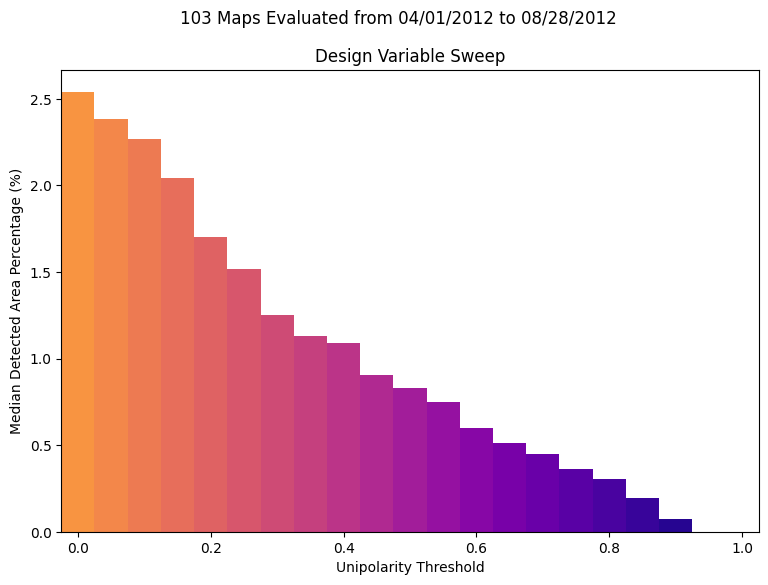

In [ ]:
# area_file_name = f'{out_dir}Area_comp_{"_".join(descript_list)}'
area_percent_df = area_percent_df_by_method_list[0]
median_area_percent_by_cl = [
    np.median(area_percent_df[cl]) for cl in confidence_level_list
]

x_ticks = np.arange(len(method_list))
plt.figure(1, figsize=(9,6))

# Loop over confidence levels to plot bars for all methods at once
for median_area_percent, cl_dx, color in zip(
    median_area_percent_by_cl, cl_dx_list, color_list):
    plt.bar(x_ticks + cl_dx, median_area_percent, width=0.05, color=color)

plt.suptitle((f'{num_maps} Maps Evaluated from '
             + f'{title_date_strs[0]} to {title_date_strs[-1]}'))
plt.title('Design Variable Sweep')
plt.ylabel('Median Detected Area Percentage (%)')
plt.xlabel('Unipolarity Threshold')
plt.xlim([-0.025,1.025])

Autocorrelation Sweep

(-0.025, 1.025)

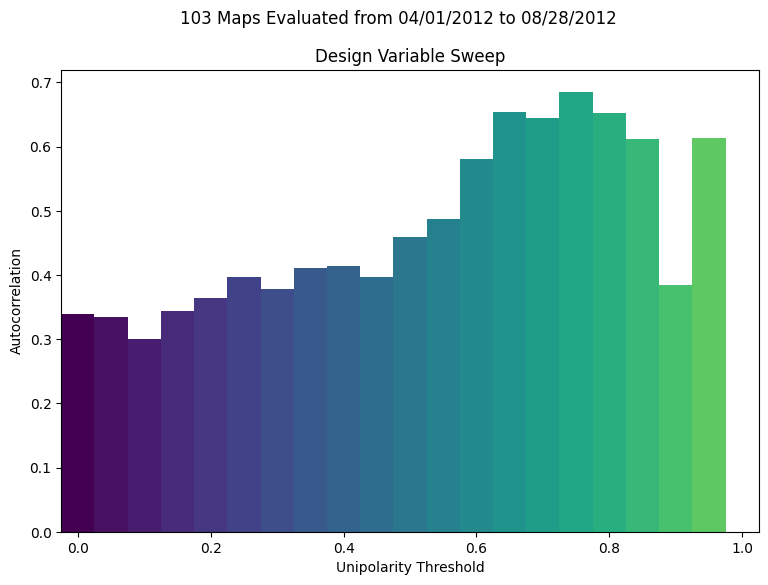

In [ ]:
autocorr_file_name = f'{out_dir}Autocorr_comp_{"_".join(descript_list)}'
autocorrs_by_cl_by_method = np.load(autocorr_file_name + '.npy', allow_pickle=True)
autocorrs_by_method_by_cl = autocorrs_by_cl_by_method.T

x_ticks = np.arange(len(method_list))

plt.figure(1, figsize=(9,6))

# Loop over confidence levels to plot bars for all methods at once
for autocorrs_by_method, cl_dx, color in zip(
    autocorrs_by_method_by_cl, cl_dx_list, color_list):
    plt.bar(x_ticks + cl_dx, autocorrs_by_method, width=0.05,
            color=color)

plt.suptitle((f'{num_maps} Maps Evaluated from '
             + f'{title_date_strs[0]} to {title_date_strs[-1]}'))
plt.title('Design Variable Sweep')
plt.ylabel(f'Autocorrelation')
plt.xlabel('Unipolarity Threshold')
plt.xlim([-0.025,1.025])

#### Method Comparison

Autocorrelation by Method

In [7]:
autocorr_file_name = f'{out_dir}Autocorr_comp_{"_".join(descript_list)}'
autocorrs_by_cl_by_method = np.load(autocorr_file_name + '.npy', allow_pickle=True)
autocorrs_by_method_by_cl = autocorrs_by_cl_by_method.T

x_ticks = np.arange(len(method_list))
confidence_label_list = [
    f'{confidence_level}% Confidence'
    for confidence_level in confidence_level_list
]

plt.figure(1, figsize=(9,6))

# Loop over confidence levels to plot bars for all methods at once
for autocorrs_by_method, cl_dx, confidence, color in zip(
    autocorrs_by_method_by_cl, cl_dx_list, confidence_label_list, color_list):
    plt.bar(x_ticks + cl_dx, autocorrs_by_method, width=0.2,
            label=confidence, color=color)

plt.suptitle((f'{num_maps} Maps Evaluated from '
             + f'{title_date_strs[0]} to {title_date_strs[-1]}'))
plt.title('Method Comparison')
plt.xticks(x_ticks, method_list)
plt.ylabel(f'Autocorrelation')

# plt.ylim([0, 0.8])
# plt.ylim([-0.1, 0.8])
# plt.axhline(0, color='k', linestyle='--')
plt.legend(loc='upper left')

# Save plot
plt.savefig(autocorr_file_name + '.png')
plt.close()
print(f'{autocorr_file_name.split("/")[-1]} method comparison saved.')

Autocorr_comp_v0_1_v0_2_v0_3_v0_4_v0_5_cl0_cl35_cl65_cl95 method comparison saved.


MAD

In [ ]:
x_ticks = np.arange(len(confidence_level_list))
confidence_label_list = [
    f'{confidence_level}% Confidence'
    for confidence_level in confidence_level_list
]

plt.figure(1, figsize=(9,6))
for mad_by_confidences, cl_dx, method, color in zip(
    mad_by_conf_by_method_list, cl_dx_list, method_list, color_list):
    plt.bar(x_ticks + cl_dx, mad_by_confidences, width=0.2,
            label=method, color=color)

plt.suptitle((f'{num_maps} Maps Evaluated from '
             + f'{title_date_strs[0]} to {title_date_strs[-1]}'))
plt.title('Method Comparison')
plt.xticks(x_ticks, confidence_label_list, rotation=10)
plt.ylabel(f'MAD of Detected Area (Mm^2)')
plt.legend()

Normalized MAD

In [ ]:
x_ticks = np.arange(len(confidence_level_list))
confidence_label_list = [
    f'{confidence_level}% Confidence'
    for confidence_level in confidence_level_list
]

plt.figure(1, figsize=(9,6))
for norm_mad_by_confidences, cl_dx, method, color in zip(
    norm_mad_by_conf_by_method_list, cl_dx_list, method_list, color_list):
    plt.bar(x_ticks + cl_dx, norm_mad_by_confidences, width=0.2,
            label=method, color=color)
    
plt.suptitle((f'{num_maps} Maps Evaluated from '
             + f'{title_date_strs[0]} to {title_date_strs[-1]}'))
plt.title('Method Comparison')
plt.xticks(x_ticks, confidence_label_list, rotation=10)
plt.ylim([0, 50])
plt.ylabel(f'Normalized MAD of Detected Area (%)')
plt.legend()

### Write Images to Video

In [6]:
detect.write_video(output_dir, fps=2)

Moviepy - Building video output/Detection/v0_5/2012_06/Preprocess_Comparison/video_2fps.mp4.
Moviepy - Writing video output/Detection/v0_5/2012_06/Preprocess_Comparison/video_2fps.mp4



Moviepy - Done !
Moviepy - video ready output/Detection/v0_5/2012_06/Preprocess_Comparison/video_2fps.mp4
